This notebook is to handle different SQL queries to better explore and understand the data. The data cleaning and covertion to pandas for different type of data handling is already done. Here importance is for SQL.

In [4]:
import pandas as pd
import pandas_gbq
from google.cloud import bigquery
%load_ext google.cloud.bigquery
# Set your default project here
pandas_gbq.context.project = 'bigquery-public-data'
pandas_gbq.context.dialect = 'standard'

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [5]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\pravd\Downloads\unacast-334100-f70d949ff84e.json"

The below query returns number of bikes in usage per year

In [7]:
%%bigquery
SELECT EXTRACT(YEAR FROM starttime) AS year, 
       COUNT(DISTINCT(bikeid)) AS num_bikes
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.38rows/s]


,year,num_bikes
0,NaN,0
1,2013.0,6503
2,2014.0,6811
3,2015.0,8477
4,2016.0,10495
5,2017.0,13820
6,2018.0,12947


The below query returns count of subscribers and customers 

In [12]:
%%bigquery

SELECT EXTRACT(YEAR FROM starttime) AS year,
COUNT(CASE WHEN usertype= 'Subscriber' THEN 1 END) AS count_sub,
COUNT(CASE WHEN usertype= 'Customer' THEN 1 END) AS count_cus,
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.55rows/s]


,year,count_sub,count_cus
0,NaN,0,0
1,2013.0,4370245,666940
2,2014.0,7287721,793495
3,2015.0,8626638,1311331
4,2016.0,9026384,1236265
5,2017.0,12441957,1676712
6,2018.0,5164627,506406


The below query returns count on female and male

In [22]:
%%bigquery
SELECT EXTRACT(YEAR FROM starttime) AS year,
COUNT(CASE WHEN gender= 'female' THEN 1 END) AS count_fem,
COUNT(CASE WHEN gender= 'male' THEN 1 END) AS count_male,
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year;

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.45rows/s]


,year,count_fem,count_male
0,NaN,0,0
1,2013.0,1034631,3335391
2,2014.0,1650274,5635962
3,2015.0,2006962,6608929
4,2016.0,2186917,6769032
5,2017.0,3236735,9306602
6,2018.0,1260893,3955871


Query Visualize using pandas

In [23]:

client = bigquery.Client()

In [43]:
sql = """ SELECT EXTRACT(YEAR FROM starttime) AS year,
COUNT(CASE WHEN gender= 'female' THEN 1 END) AS count_fem,
COUNT(CASE WHEN gender= 'male' THEN 1 END) AS count_male,
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
ORDER BY year; """

df = client.query(sql).to_dataframe()
df.dropna(inplace=True)
df.head()

,year,count_fem,count_male
1,2013.0,1034631,3335391
2,2014.0,1650274,5635962
3,2015.0,2006962,6608929
4,2016.0,2186917,6769032
5,2017.0,3236735,9306602


In [44]:
%matplotlib inline

<AxesSubplot:xlabel='year'>

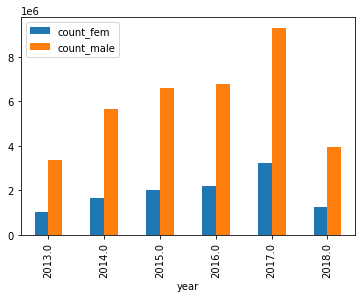

In [45]:
df.plot(x="year", y=["count_fem", "count_male"], kind="bar")

In [49]:
sql_1 = """SELECT
  EXTRACT(year
  FROM
    starttime) AS year,
  SUM(CASE
      WHEN gender='female' THEN tripduration
  END
    )/60*60 AS Male_ride_time,
  SUM(CASE
      WHEN gender='male' THEN tripduration
  END
    )/60*60 AS Female_ride_time
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY
  year
HAVING 
  year is NOT NULL
ORDER BY
  year DESC"""

In [50]:
df2 = client.query(sql_1).to_dataframe()
df2.dropna(inplace=True)
df2.head()


,year,Male_ride_time,Female_ride_time
0,2018,1.267776e+09,3.252467e+09
1,2017,3.342083e+09,8.188900e+09
2,2016,2.063674e+09,5.397053e+09
3,2015,1.878910e+09,5.142384e+09
4,2014,1.427969e+09,4.165423e+09


<AxesSubplot:xlabel='year'>

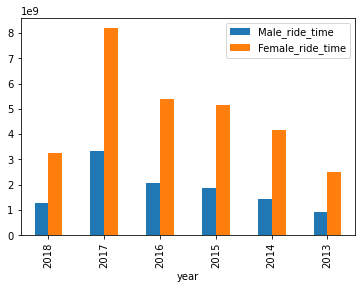

In [52]:
%matplotlib inline
df2.plot(x="year", y=["Male_ride_time", "Female_ride_time"], kind="bar")